In [1]:
import tensorflow as tf
import numpy as np

In [24]:
#Aqui voy a poner los juegos que ha jugado por temporada desde la 2014 hasta las 2019 el jugador Jayce Carroll. #37
prueba_games = 37
games_played = np.array([40,45, 41, 42, 39, 25 ], dtype=float)
#Aqui voy a poner los puntos por partido promediados por temporada desde la 2014 hasta la 2019 del mismo jugador. #Puntos esperados 10.8 
puntos_esperados = 10.8
points_per_game = np.array([9.1,12.9, 12.1, 12.1, 9.9, 10.4 ], dtype=float)

In [3]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [4]:
#Para el optimizador utilizare uno llamado ADAM, que le permite a la red ajustar los pesos y sesgos de manera eficiente para que aprenda y no desaprenda. 0,1 es la tasa de aprendizaje
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [5]:
print("Empezando el entrenamiento")
historial = modelo.fit(games_played,points_per_game, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento...
Modelo entrenado!


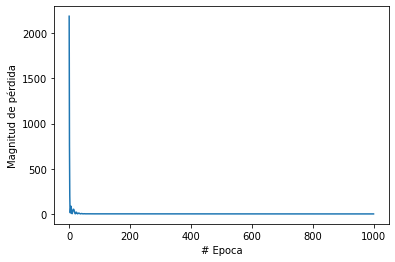

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [25]:
print("Hagamos una predicción!")
resultado = modelo.predict([prueba_games])
print("El resultado es " + str(resultado) + " puntos por partido en una temporada!")

Hagamos una predicción!
El resultado es [[10.923233]] puntos por partido en una temporada!


In [26]:
#Calculo del error porcentual en nuestra prediccion
Porcentaje_error = (((puntos_esperados-resultado)/puntos_esperados)*100)
print(str(Porcentaje_error)+"%")

[[-1.1410447]]%


In [9]:
print("Variables internas del modelo")
print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[1.4141871]], dtype=float32), array([0.], dtype=float32)]
[array([[ 0.21907952, -0.06484165, -0.10540193]], dtype=float32), array([ 0.9077552, -0.0498809,  2.197553 ], dtype=float32)]
[array([[-1.2763265 ,  1.2578328 ,  0.13687277],
       [ 0.51804465,  0.00281893, -0.33229712],
       [-0.6118253 , -0.17194805, -0.9650071 ]], dtype=float32), array([-2.9703493, -1.172716 ,  1.0425324], dtype=float32)]
[array([[-0.953505 ],
       [-0.5480675],
       [ 0.1289789]], dtype=float32), array([2.0221686], dtype=float32)]
